In [1]:
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv('data/UNSW_NB15_training-set.csv')

In [3]:
feat = pd.read_csv('data/UNSW_NB15_features.csv', encoding='cp1252')

In [4]:
feat.head(50)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [5]:
df.shape

(82332, 45)

In [6]:
df.sample(5).head().T

,44454,40103,53358,17492,62505
id,44455,40104,53359,17493,62506
dur,0.000009,0.007542,3.012387,0.000008,0.00001
proto,udp,tcp,tcp,udp,udp
service,-,-,http,dns,dns
state,INT,FIN,FIN,INT,INT
spkts,2,34,32,2,2
dpkts,0,26,6,0,0
sbytes,762,4908,34068,114,114
dbytes,0,2448,268,0,0
rate,111111.1072,7822.8585,12.282618,125000.0003,100000.0025


In [7]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

<AxesSubplot:title={'center':'Number of attacks by category'}>

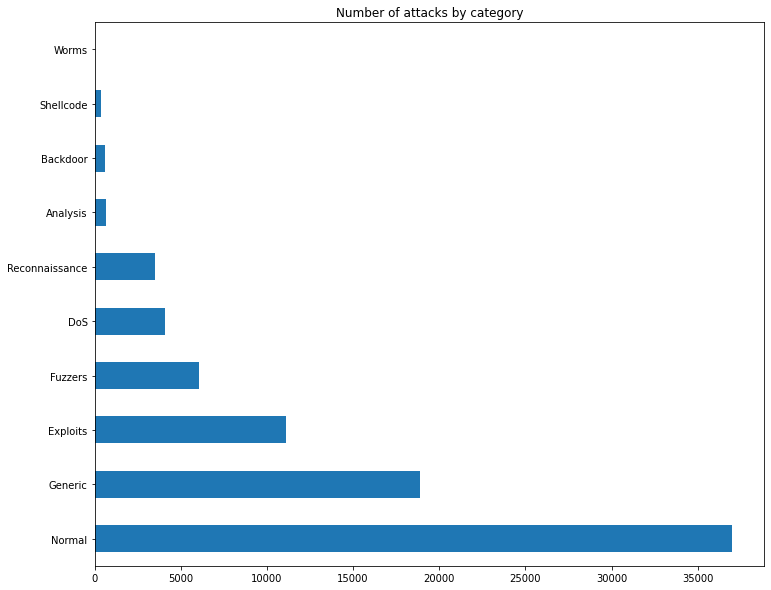

In [8]:
df['attack_cat'].value_counts().plot(kind='barh', title='Number of attacks by category', figsize=(12, 10))

In [9]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:title={'center':'Normal vs Malicious packet breakdown'}, ylabel='Benign or Malicious'>

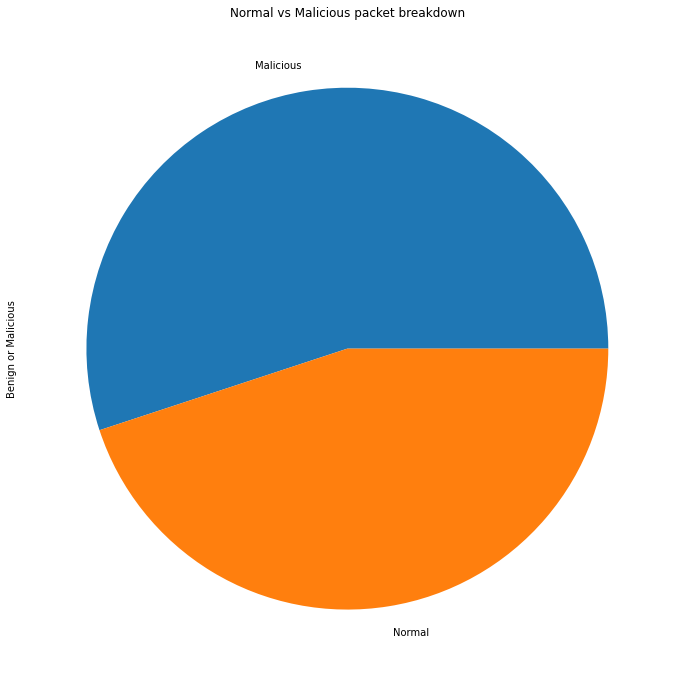

In [10]:
df['label'].value_counts().plot(
    kind='pie',
    title="Normal vs Malicious packet breakdown",
    figsize=(12, 12),
    ylabel='Benign or Malicious',
    labels=['Malicious', 'Normal']
)




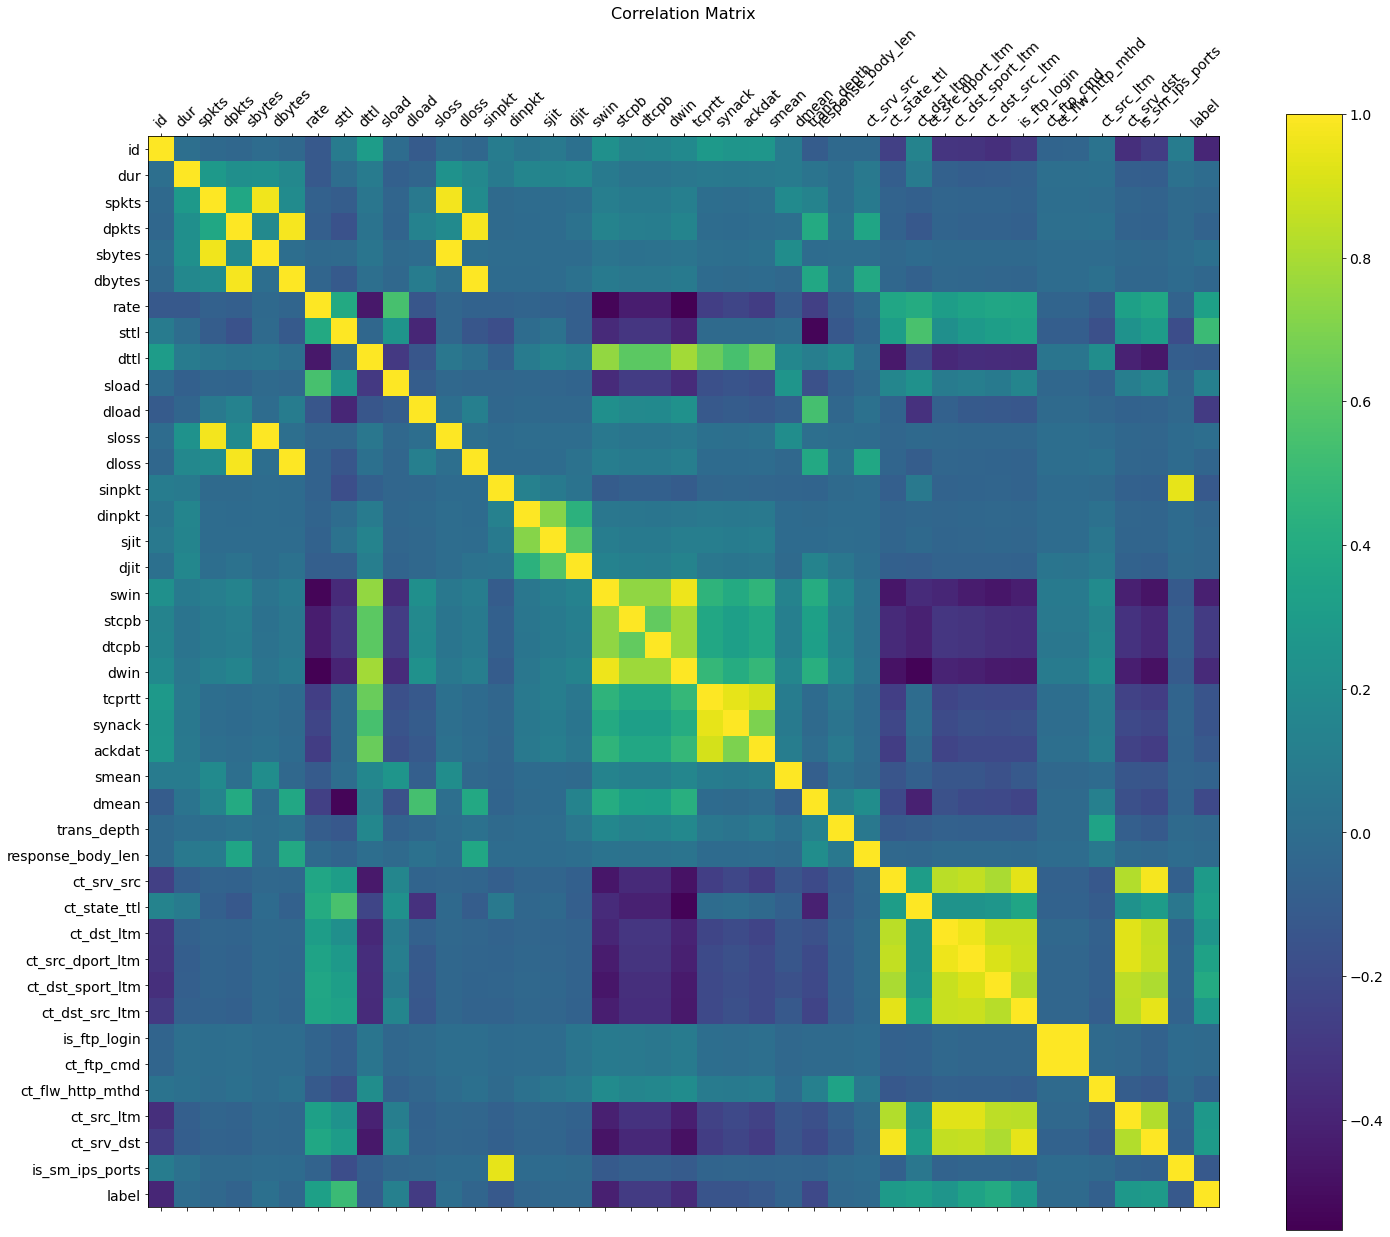

In [11]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(24, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [12]:
df['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [13]:
df['service'].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [14]:
df['service'] = df['service'].replace('-','none').apply(lambda x: x.strip().lower())



In [15]:
df['state'].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [16]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [17]:
df['is_ftp_login'].value_counts()
df['is_sm_ips_ports'].value_counts()

0    81416
1      916
Name: is_sm_ips_ports, dtype: int64

In [18]:
df['is_ftp_login'] = np.where(df['is_ftp_login'] > 1, 1, df['is_ftp_login'])
df['is_sm_ips_ports'] = np.where(df['is_sm_ips_ports'] > 1, 1, df['is_sm_ips_ports'])

In [19]:
df['ct_flw_http_mthd'].value_counts()


0     74752
1      6908
4       478
9       126
16       32
2        18
12       12
6         6
Name: ct_flw_http_mthd, dtype: int64

In [20]:
# Identify columns with >95% correlation
# Credit: https://medium.com/@subrata.maji16/building-an-intrusion-detection-system-on-unsw-nb15-dataset-based-on-machine-learning-algorithm-16b1600996f5

corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
columns_to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
print(columns_to_drop)


['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_ftp_cmd', 'ct_srv_dst']


/var/folders/7r/72pw73153fq0wxt3j2p7tklh0000gn/T/ipykernel_32451/3197516954.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [21]:
df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [22]:
# Removing attack_cat for binary classification
df.drop(['attack_cat', 'id'], axis=1, inplace=True, errors='ignore')

In [23]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,0.000011,udp,none,INT,2,0,90909.0902,254,0,180363632.0,...,2,2,1,1,2,0,0,1,0,0
1,0.000008,udp,none,INT,2,0,125000.0003,254,0,881000000.0,...,2,2,1,1,2,0,0,1,0,0
2,0.000005,udp,none,INT,2,0,200000.0051,254,0,854400000.0,...,3,2,1,1,3,0,0,1,0,0
3,0.000006,udp,none,INT,2,0,166666.6608,254,0,600000000.0,...,3,2,2,1,3,0,0,2,0,0
4,0.000010,udp,none,INT,2,0,100000.0025,254,0,850400000.0,...,3,2,2,1,3,0,0,2,0,0


In [24]:
df.shape

(82332, 35)

In [25]:
num_col = [col for col in df.columns if col not in ['label', 'proto', 'service', 'state']]
num_col

['dur',
 'spkts',
 'dpkts',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'is_sm_ips_ports']

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [27]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,1.833334e-07,udp,none,INT,0.000094,0.0,0.090909,0.996078,0.0,0.034238,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
1,1.333334e-07,udp,none,INT,0.000094,0.0,0.125000,0.996078,0.0,0.167236,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
2,8.333335e-08,udp,none,INT,0.000094,0.0,0.200000,0.996078,0.0,0.162187,...,0.032258,0.333333,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.0,0
3,1.000000e-07,udp,none,INT,0.000094,0.0,0.166667,0.996078,0.0,0.113895,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0
4,1.666667e-07,udp,none,INT,0.000094,0.0,0.100000,0.996078,0.0,0.161427,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0


In [28]:
cat_col = ['proto', 'service', 'state']
ohe_df = pd.get_dummies(df[cat_col], drop_first = True)
df = pd.concat([df, ohe_df], axis = 1)

In [29]:
df.drop(cat_col, axis=1, inplace=True, errors='ignore')

In [30]:
df.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1.833334e-07,0.000094,0.0,0.090909,0.996078,0.0,0.034238,0.0,1.833028e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.333334e-07,0.000094,0.0,0.125000,0.996078,0.0,0.167236,0.0,1.333111e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
2,8.333335e-08,0.000094,0.0,0.200000,0.996078,0.0,0.162187,0.0,8.331946e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1.000000e-07,0.000094,0.0,0.166667,0.996078,0.0,0.113895,0.0,9.998335e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.666667e-07,0.000094,0.0,0.100000,0.996078,0.0,0.161427,0.0,1.666389e-07,0.0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
data_cols = [c for c in df.columns if c != 'label']
label_col = 'label'

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[data_cols], df['label'], test_size=0.25, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

logitRegr = LogisticRegression()

In [34]:
logitRegr.fit(x_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
logitRegr.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [36]:
x_test.iloc[0].values.reshape(1,-1)

array([[5.00000092e-08, 9.39408173e-05, 0.00000000e+00, 3.33333321e-01,
        9.96078431e-01, 0.00000000e+00, 2.27790407e-02, 0.00000000e+00,
        4.99916747e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.41891892e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.12903226e-01, 1.00000000e+00,
        3.44827586e-02, 0.00000000e+00, 8.06451613e-02, 0.00000000e+00,
        0.00000000e+00, 5.08474576e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [37]:
score = logitRegr.score(x_test, y_test)
print(score)

0.9119176019044842


In [38]:
predictions = logitRegr.predict(x_test)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 8453   798]
 [ 1015 10317]]


Text(0.5, 1.0, 'Accuracy Score: 0.9119176019044842')

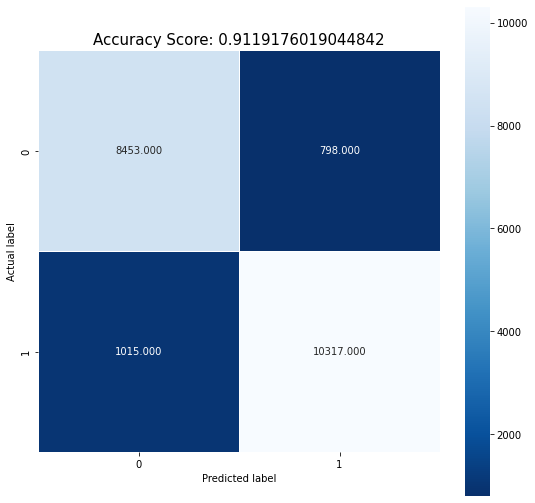

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

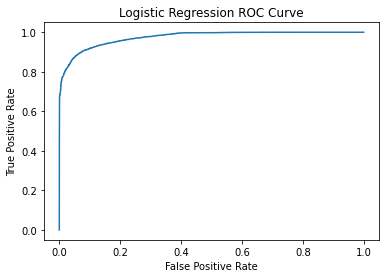

In [41]:
#define metrics
y_pred_proba = logitRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [42]:
x_test.shape

(20583, 179)

In [43]:
df.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1.833334e-07,0.000094,0.0,0.090909,0.996078,0.0,0.034238,0.0,1.833028e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
1,1.333334e-07,0.000094,0.0,0.125000,0.996078,0.0,0.167236,0.0,1.333111e-07,0.0,...,0,0,0,0,0,0,0,1,0,0
2,8.333335e-08,0.000094,0.0,0.200000,0.996078,0.0,0.162187,0.0,8.331946e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1.000000e-07,0.000094,0.0,0.166667,0.996078,0.0,0.113895,0.0,9.998335e-08,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.666667e-07,0.000094,0.0,0.100000,0.996078,0.0,0.161427,0.0,1.666389e-07,0.0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
import autogluon

In [45]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [46]:
df2 = df.drop(['state_CLO', 'state_CON'], axis=1, errors='ignore')

In [47]:
ag_train_data = TabularDataset(df2)

In [48]:
ag_train_data.shape

(82332, 178)

In [49]:
subsample_size = 50000
ag_train_data_sample = ag_train_data.sample(n=subsample_size, random_state=0)
ag_train_data_sample.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST
75179,5.000001e-08,0.000094,0.000000,0.333333,0.996078,0.000000,2.277904e-02,0.000000,4.999167e-08,0.000000,...,0,0,0,0,0,0,0,0,1,0
20654,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,2.164009e-02,0.000000,6.665557e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
56735,1.166667e-07,0.000094,0.000000,0.166667,0.996078,0.000000,2.531005e-02,0.000000,9.998335e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
48735,4.758384e-03,0.000845,0.000545,0.000053,0.996078,0.996047,4.196725e-06,0.000301,5.067952e-04,0.000883,...,0,0,0,0,0,0,1,0,0,0
54791,3.448679e-02,0.000658,0.000726,0.000007,0.243137,0.996047,2.341159e-07,0.000256,4.925863e-03,0.004827,...,0,0,0,0,0,0,1,0,0,0


In [50]:
label = 'label'
print("Summary of class variable: \n", ag_train_data_sample[label].describe())

Summary of class variable: 
 count    50000.000000
mean         0.550600
std          0.497438
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: label, dtype: float64


In [51]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [52]:
save_path = 'models'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(ag_train_data_sample)

Beginning AutoGluon training ...
AutoGluon will save models to "models/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.4.0: Fri Mar 18 00:45:05 PDT 2022; root:xnu-8020.101.4~15/RELEASE_X86_64
Train Data Rows:    50000
Train Data Columns: 177
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6953.92 MB
	Train Data (Original)  Memory Usage: 19.7 MB (0.3% of available memor

[1000]	valid_set's binary_error: 0.0296


	0.9764	 = Validation score   (accuracy)
	0.94s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9672	 = Validation score   (accuracy)
	5.57s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9684	 = Validation score   (accuracy)
	5.39s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	0.9716	 = Validation score   (accuracy)
	3.95s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9652	 = Validation score   (accuracy)
	7.17s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9664	 = Validation score   (accuracy)
	6.75s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9684	 = Validation score   (accuracy)
	43.97s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: XGBoost ...
	0.9764	 = Validation score   (accuracy)
	1.68s	 = Training   runtime
	0.02s

In [53]:
df_test = pd.read_csv('data/UNSW_NB15_testing-set.csv')

In [54]:
df_test.shape

(175341, 45)

In [55]:
df_test = df_test.sample(50000)

In [56]:
df_test['service'] = df_test['service'].replace('-','none').apply(lambda x: x.strip().lower())
df_test.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')
df_test.drop(['attack_cat', 'id'], axis=1, inplace=True, errors='ignore')

df_test[num_col] = scaler.transform(df_test[num_col])

ohe_df = pd.get_dummies(df_test[cat_col], drop_first = True)
df_test = pd.concat([df_test, ohe_df], axis = 1)

df_test.drop(cat_col, axis=1, inplace=True, errors='ignore')

In [57]:
df_test.shape

(50000, 181)

In [58]:
df.shape

(82332, 180)

In [59]:
[col for col in df_test.columns if col not in df2.columns]

['proto_icmp', 'state_ECO', 'state_no']

In [60]:
[col for col in df2.columns if col not in df_test.columns]

[]

In [61]:
ag_test_data = TabularDataset(df_test)

In [62]:
predictor.leaderboard(ag_test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestGini,0.90590,0.9672,0.475573,0.090661,5.574134,0.475573,0.090661,5.574134,1,True,5
1,RandomForestEntr,0.90516,0.9684,0.456916,0.085584,5.386849,0.456916,0.085584,5.386849,1,True,6
2,LightGBMXT,0.90374,0.9712,0.512660,0.030239,2.575364,0.512660,0.030239,2.575364,1,True,3
3,CatBoost,0.90358,0.9716,0.063247,0.008211,3.952498,0.063247,0.008211,3.952498,1,True,7
4,XGBoost,0.90260,0.9764,0.246601,0.019486,1.675020,0.246601,0.019486,1.675020,1,True,11
5,LightGBM,0.90132,0.9764,0.136431,0.015922,0.944519,0.136431,0.015922,0.944519,1,True,4
6,LightGBMLarge,0.90072,0.9792,0.168241,0.018207,2.066038,0.168241,0.018207,2.066038,1,True,13
7,WeightedEnsemble_L2,0.90044,0.9804,71.184047,2.991589,4.882003,0.008653,0.003984,1.077378,2,True,14
8,ExtraTreesEntr,0.89824,0.9664,0.711377,0.088012,6.745666,0.711377,0.088012,6.745666,1,True,9
9,ExtraTreesGini,0.89780,0.9652,0.625358,0.090811,7.169000,0.625358,0.090811,7.169000,1,True,8


In [63]:
x_test2 = df_test[[col for col in df_test.columns if col not in ['label', 'proto_icmp', 'state_ECO', 'state_no']]]
y_test2 = df_test['label']

In [64]:
# score = logitRegr.score(x_test2, y_test2)
# print(score)

In [65]:
x_test['state_CLO'].value_counts()

0    20583
Name: state_CLO, dtype: int64

In [66]:
x_test['state_CON'].value_counts()

0    18849
1     1734
Name: state_CON, dtype: int64

In [67]:
x_test2 = x_test2.copy()

In [68]:
x_test2.loc[:, 'state_CLO'] = 0
x_test2.loc[:, 'state_CON'] = 0
x_test2

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST,state_CLO,state_CON
87395,1.928715e-02,0.000845,0.000726,0.000015,0.996078,0.996047,1.141679e-06,0.000103,2.038527e-03,2.661040e-03,...,0,0,0,0,1,0,0,0,0,0
171525,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,2.164009e-02,0.000000,6.665557e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
100997,3.536851e-03,0.000470,0.000182,0.000033,0.243137,0.996047,5.882313e-06,0.000078,7.072522e-04,1.212347e-07,...,0,0,0,0,0,0,0,0,0,0
106304,1.500000e-07,0.000094,0.000000,0.111111,0.996078,0.000000,1.687336e-02,0.000000,1.499750e-07,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
170606,1.929705e-02,0.000845,0.000726,0.000015,0.996078,0.996047,6.216993e-07,0.000103,2.096019e-03,2.603743e-03,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51303,9.070118e-03,0.000845,0.000545,0.000028,0.996078,0.996047,4.651743e-06,0.000158,1.007623e-03,1.645917e-03,...,0,0,0,0,1,0,0,0,0,0
10178,7.200001e-05,0.001973,0.001271,0.008102,0.121569,0.114625,4.935459e-04,0.142750,3.427996e-06,4.869375e-06,...,0,0,0,0,1,0,0,0,0,0
62266,6.666668e-08,0.000094,0.000000,0.250000,0.996078,0.000000,3.189066e-02,0.000000,6.665557e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
70760,8.333335e-08,0.000094,0.000000,0.200000,0.996078,0.000000,3.037206e-02,0.000000,8.331946e-08,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0


In [69]:
score = logitRegr.score(x_test2, y_test2)
print(score)

0.44106


/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [70]:
df_test_original = pd.read_csv('data/UNSW_NB15_testing-set.csv')

<AxesSubplot:title={'center':'Normal vs Malicious packet breakdown'}, ylabel='Benign or Malicious'>

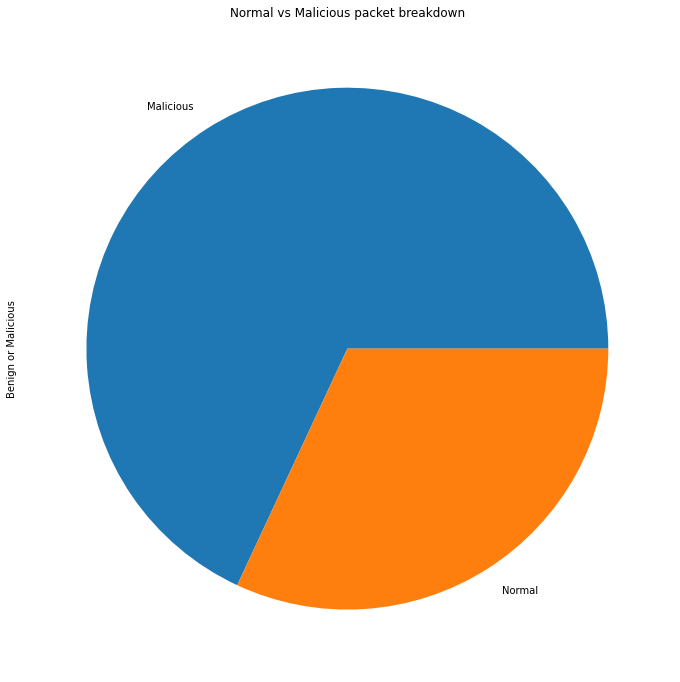

In [71]:
df_test_original['label'].value_counts().plot(
    kind='pie',
    title="Normal vs Malicious packet breakdown",
    figsize=(12, 12),
    ylabel='Benign or Malicious',
    labels=['Malicious', 'Normal']
)


<AxesSubplot:title={'center':'Number of attacks by category'}>

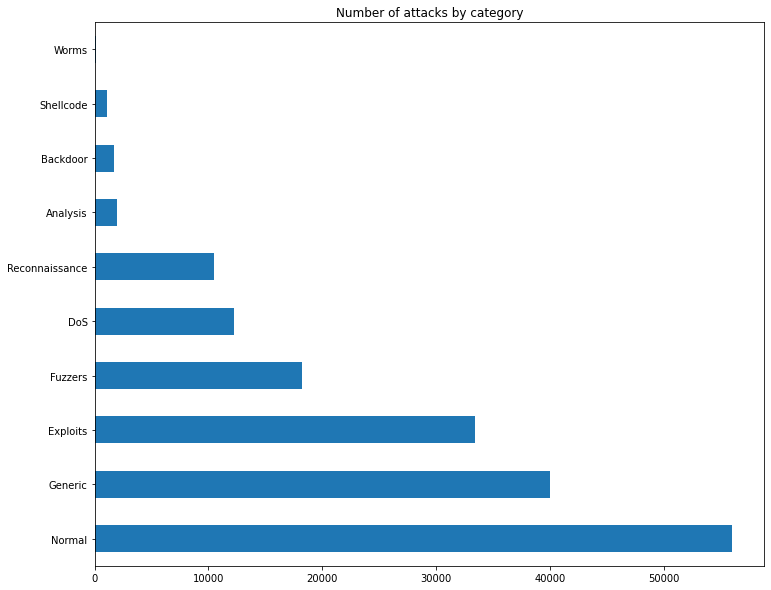

In [72]:
df_test_original['attack_cat'].value_counts().plot(kind='barh', title='Number of attacks by category', figsize=(12, 10))


In [73]:
df_test.size

9050000

In [ ]:
# The following 3 models are guided by work done from a Kaggle contributor here: https://www.kaggle.com/code/carlkirstein/unsw-nb15-modelling-97-7

# The models were used for baseline accuracy and the architecture experimented with in an attempt to reach higher accuracy


In [76]:
#Import libraries that will allow you to use keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from keras import metrics
# import keras_metrics as km #when compiling
import keras
import numpy as np
from numpy import array

In [77]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [82]:
import time
x_train.head()

,dur,spkts,dpkts,rate,sttl,dttl,sload,dload,sinpkt,dinpkt,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
53696,1.094269e-02,0.001033,0.000726,0.000029,0.996078,0.996047,2.213508e-06,0.000390,5.442225e-02,0.084804,...,0,0,0,0,0,0,1,0,0,0
51492,3.333334e-08,0.000094,0.000000,0.500000,0.996078,0.000000,4.328018e-02,0.000000,3.332778e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
43528,1.333334e-07,0.000094,0.000000,0.125000,0.996078,0.000000,7.403189e-03,0.000000,1.333111e-07,0.000000,...,0,0,0,0,0,0,0,1,0,0
10146,5.000001e-08,0.000094,0.000000,0.333333,0.996078,0.000000,4.252088e-02,0.000000,4.999167e-08,0.000000,...,0,0,0,0,0,0,0,1,0,0
2129,3.857261e-02,0.001033,0.000908,0.000009,0.996078,0.996047,6.679774e-07,0.000123,3.421389e-03,0.004253,...,0,0,0,0,0,0,1,0,0,0


In [148]:
predictor.info().get('model_info').get('NeuralNetFastAI')

{'name': 'NeuralNetFastAI',
 'model_type': 'NNFastAiTabularModel',
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 43.969533920288086,
 'num_classes': 2,
 'quantile_levels': None,
 'predict_time': 0.08711719512939453,
 'val_score': 0.9684,
 'hyperparameters': {'layers': None,
  'emb_drop': 0.1,
  'ps': 0.1,
  'bs': 'auto',
  'lr': 0.01,
  'epochs': 'auto',
  'early.stopping.min_delta': 0.0001,
  'early.stopping.patience': 20,
  'smoothing': 0.0},
 'hyperparameters_fit': {'epochs': 30, 'best_epoch': 26},
 'hyperparameters_nondefault': [],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': ['bool', 'int', 'float', 'category'],
  'valid_special_types': None,
  'ignored_type_group_special': ['text_ngram', 'text_as_category'],
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_bat

In [103]:
predictor.info().get('model_info').get('NeuralNetTorch')

{'name': 'NeuralNetTorch',
 'model_type': 'TabularNeuralNetTorchModel',
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 82.13947296142578,
 'num_classes': 2,
 'quantile_levels': None,
 'predict_time': 0.04391789436340332,
 'val_score': 0.97,
 'hyperparameters': {'num_epochs': 500,
  'epochs_wo_improve': 20,
  'activation': 'relu',
  'embedding_size_factor': 1.0,
  'embed_exponent': 0.56,
  'max_embedding_dim': 100,
  'y_range': None,
  'y_range_extend': 0.05,
  'dropout_prob': 0.1,
  'optimizer': 'adam',
  'learning_rate': 0.0003,
  'weight_decay': 1e-06,
  'proc.embed_min_categories': 4,
  'proc.impute_strategy': 'median',
  'proc.max_category_levels': 100,
  'proc.skew_threshold': 0.99,
  'use_ngram_features': False,
  'num_layers': 4,
  'hidden_size': 128,
  'max_batch_size': 512,
  'use_batchnorm': False,
  'loss_function': 'auto'},
 'hyperparameters_fit': {'batch_size': 128, 'num_epochs': 40},
 'hyperparameters_nondefault': [],
 

In [108]:
hyperparameters = {
   'NN': {'num_epochs': 500},
   'CAT': {'iterations': 10000},
   'RF': {'n_estimators': 300},
   'XT': {'n_estimators': 300},
   'KNN': {},
}

In [109]:
save_path = 'models2'  # specifies folder to store trained models
predictor_tuned = TabularPredictor(label=label).fit(ag_train_data_sample, hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20230308_034017/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230308_034017/"
AutoGluon Version:  0.6.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 21.4.0: Fri Mar 18 00:45:05 PDT 2022; root:xnu-8020.101.4~15/RELEASE_X86_64
Train Data Rows:    50000
Train Data Columns: 177
Label Column: label
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Availabl

In [112]:
predictor_tuned.info().get('model_info').get('NeuralNetTorch')

In [110]:
predictor_tuned.leaderboard(ag_test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForest,0.90590,0.9672,0.446554,0.082910,4.376212,0.446554,0.082910,4.376212,1,True,2
1,CatBoost,0.90358,0.9716,0.036925,0.007366,3.312030,0.036925,0.007366,3.312030,1,True,3
2,WeightedEnsemble_L2,0.90250,0.9736,61.855403,3.627589,14.519430,0.019893,0.003664,0.407765,2,True,5
3,ExtraTrees,0.89780,0.9652,0.618718,0.329914,6.373390,0.618718,0.329914,6.373390,1,True,4
4,KNeighbors,0.86836,0.9260,60.733313,3.203735,0.050033,60.733313,3.203735,0.050033,1,True,1


In [195]:
def worker(test_dataset, model, model_name, start, end_train):
    try:
        test_x, test_y, mp = test_dataset
        loss, accuracy, f1s, precision, recall = model.evaluate(test_x, test_y)
        end_predict = time.time()
        mp.loc[model_name] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]
    except Exception as e:
        print(f"error with item: {e}")
        
        
        

In [201]:
def worker2(test_dataset, model, model_name, start, end_train):
    try:
        test_x, test_y, mp = test_dataset
        loss, accuracy = model.evaluate(test_x, test_y)
        end_predict = time.time()
        mp.loc[model_name] = [accuracy, accuracy, accuracy, accuracy,end_train-start,end_predict-end_train,end_predict-start]
    except Exception as e:
        print(f"error with item: {e}")

In [196]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

model_performance2 = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

from multiprocessing.pool import ThreadPool as Pool
# from multiprocessing import Pool

pool_size = 5  # your "parallelness"

pool = Pool(pool_size)



In [197]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP (Keras)', start, end_train,))


Epoch 1/200
31/31 - 1s - loss: 2.8304 - accuracy: 0.4154 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 634ms/epoch - 20ms/step
Epoch 2/200
31/31 - 0s - loss: 2.1354 - accuracy: 0.5506 - f1_m: 0.0848 - precision_m: 0.2966 - recall_m: 0.0626 - 87ms/epoch - 3ms/step
Epoch 3/200
31/31 - 0s - loss: 1.2537 - accuracy: 0.5510 - f1_m: 0.7369 - precision_m: 0.6732 - recall_m: 0.8292 - 120ms/epoch - 4ms/step
Epoch 4/200
31/31 - 0s - loss: 0.6295 - accuracy: 0.7409 - f1_m: 0.7521 - precision_m: 0.6795 - recall_m: 0.8721 - 94ms/epoch - 3ms/step
Epoch 5/200
31/31 - 0s - loss: 0.4557 - accuracy: 0.8070 - f1_m: 0.7138 - precision_m: 0.5583 - recall_m: 0.9901 - 91ms/epoch - 3ms/step
Epoch 6/200
31/31 - 0s - loss: 0.3933 - accuracy: 0.8141 - f1_m: 0.7106 - precision_m: 0.5514 - recall_m: 0.9991 - 93ms/epoch - 3ms/step
Epoch 7/200
31/31 - 0s - loss: 0.3514 - accuracy: 0.8213 - f1_m: 0.7105 - precision_m: 0.5514 - recall_m: 0.9987 - 89ms/epoch - 3ms/step
Epoch 8/200
31/31 - 0s - l

Epoch 61/200
31/31 - 0s - loss: 0.1418 - accuracy: 0.9449 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 85ms/epoch - 3ms/step
Epoch 62/200
31/31 - 0s - loss: 0.1412 - accuracy: 0.9451 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 89ms/epoch - 3ms/step
Epoch 63/200
31/31 - 0s - loss: 0.1405 - accuracy: 0.9454 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 64/200
31/31 - 0s - loss: 0.1406 - accuracy: 0.9452 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 84ms/epoch - 3ms/step
Epoch 65/200
31/31 - 0s - loss: 0.1405 - accuracy: 0.9450 - f1_m: 0.7100 - precision_m: 0.5506 - recall_m: 0.9999 - 92ms/epoch - 3ms/step
Epoch 66/200
31/31 - 0s - loss: 0.1399 - accuracy: 0.9452 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 91ms/epoch - 3ms/step
Epoch 67/200
31/31 - 0s - loss: 0.1391 - accuracy: 0.9459 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 68/200
31/31 - 0s - loss: 0.

Epoch 121/200
31/31 - 0s - loss: 0.1265 - accuracy: 0.9494 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 91ms/epoch - 3ms/step
Epoch 122/200
31/31 - 0s - loss: 0.1257 - accuracy: 0.9508 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 123/200
31/31 - 0s - loss: 0.1252 - accuracy: 0.9501 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 92ms/epoch - 3ms/step
Epoch 124/200
31/31 - 0s - loss: 0.1249 - accuracy: 0.9502 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 93ms/epoch - 3ms/step
Epoch 125/200
31/31 - 0s - loss: 0.1248 - accuracy: 0.9502 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 126/200
31/31 - 0s - loss: 0.1259 - accuracy: 0.9494 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 93ms/epoch - 3ms/step
Epoch 127/200
31/31 - 0s - loss: 0.1253 - accuracy: 0.9497 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 89ms/epoch - 3ms/step
Epoch 128/200
31/31 - 0s - 

Epoch 180/200
31/31 - 0s - loss: 0.1199 - accuracy: 0.9520 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 181/200
31/31 - 0s - loss: 0.1197 - accuracy: 0.9526 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 92ms/epoch - 3ms/step
Epoch 182/200
31/31 - 0s - loss: 0.1211 - accuracy: 0.9515 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 90ms/epoch - 3ms/step
Epoch 183/200
31/31 - 0s - loss: 0.1208 - accuracy: 0.9525 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 184/200
31/31 - 0s - loss: 0.1209 - accuracy: 0.9517 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 86ms/epoch - 3ms/step
Epoch 185/200
31/31 - 0s - loss: 0.1197 - accuracy: 0.9530 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 87ms/epoch - 3ms/step
Epoch 186/200
31/31 - 0s - loss: 0.1203 - accuracy: 0.9519 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 87ms/epoch - 3ms/step
Epoch 187/200
31/31 - 0s - 

In [203]:
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),0.938655,0.938655,0.938655,0.938655,19.268970,1.185302,20.454272
GRU (Keras),0.925240,0.925240,0.925240,0.925240,47.352389,1.472968,48.825357


In [204]:
#Build the neural network model
def build_model():
    model = Sequential()
    model.add(GRU(20, return_sequences=True,input_shape=(1,179)))
    model.add(GRU(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The GRU input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(x_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,179)

#reshape output data
X_test_array=  array(x_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,179) 

X_test2_array=  array(x_test2)
X_test2_reshaped = X_test2_array.reshape(X_test2_array.shape[0],1,179) 


#institate the model
model = build_model()

start = time.time()
#fit the model
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(X_test_reshaped, y_test, model_performance), (X_test2_reshaped, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker2, (test_dataset, model, 'GRU (Keras)', start, end_train,))

61749
Epoch 1/200
31/31 - 4s - loss: 2.1506 - accuracy: 0.5652 - 4s/epoch - 126ms/step
Epoch 2/200
31/31 - 0s - loss: 1.5860 - accuracy: 0.7232 - 201ms/epoch - 6ms/step
Epoch 3/200
31/31 - 0s - loss: 0.8684 - accuracy: 0.7101 - 199ms/epoch - 6ms/step
Epoch 4/200
31/31 - 0s - loss: 0.6167 - accuracy: 0.7276 - 201ms/epoch - 6ms/step
Epoch 5/200
31/31 - 0s - loss: 0.5236 - accuracy: 0.7633 - 254ms/epoch - 8ms/step
Epoch 6/200
31/31 - 0s - loss: 0.4583 - accuracy: 0.7957 - 205ms/epoch - 7ms/step
Epoch 7/200
31/31 - 0s - loss: 0.4049 - accuracy: 0.8117 - 216ms/epoch - 7ms/step
Epoch 8/200
31/31 - 0s - loss: 0.3642 - accuracy: 0.8193 - 211ms/epoch - 7ms/step
Epoch 9/200
31/31 - 0s - loss: 0.3344 - accuracy: 0.8308 - 209ms/epoch - 7ms/step
Epoch 10/200
31/31 - 0s - loss: 0.3130 - accuracy: 0.8395 - 213ms/epoch - 7ms/step
Epoch 11/200
31/31 - 0s - loss: 0.2966 - accuracy: 0.8449 - 210ms/epoch - 7ms/step
Epoch 12/200
31/31 - 0s - loss: 0.2833 - accuracy: 0.8552 - 209ms/epoch - 7ms/step
Epoch 13

Epoch 100/200
31/31 - 0s - loss: 0.1415 - accuracy: 0.9466 - 203ms/epoch - 7ms/step
Epoch 101/200
31/31 - 0s - loss: 0.1407 - accuracy: 0.9470 - 227ms/epoch - 7ms/step
Epoch 102/200
31/31 - 0s - loss: 0.1408 - accuracy: 0.9467 - 240ms/epoch - 8ms/step
Epoch 103/200
31/31 - 0s - loss: 0.1407 - accuracy: 0.9462 - 207ms/epoch - 7ms/step
Epoch 104/200
31/31 - 0s - loss: 0.1403 - accuracy: 0.9475 - 194ms/epoch - 6ms/step
Epoch 105/200
31/31 - 0s - loss: 0.1403 - accuracy: 0.9472 - 193ms/epoch - 6ms/step
Epoch 106/200
31/31 - 0s - loss: 0.1402 - accuracy: 0.9470 - 227ms/epoch - 7ms/step
Epoch 107/200
31/31 - 0s - loss: 0.1398 - accuracy: 0.9475 - 255ms/epoch - 8ms/step
Epoch 108/200
31/31 - 0s - loss: 0.1403 - accuracy: 0.9467 - 259ms/epoch - 8ms/step
Epoch 109/200
31/31 - 0s - loss: 0.1403 - accuracy: 0.9465 - 273ms/epoch - 9ms/step
Epoch 110/200
31/31 - 0s - loss: 0.1394 - accuracy: 0.9478 - 213ms/epoch - 7ms/step
Epoch 111/200
31/31 - 0s - loss: 0.1392 - accuracy: 0.9475 - 199ms/epoch - 6

Epoch 198/200
31/31 - 0s - loss: 0.1273 - accuracy: 0.9509 - 212ms/epoch - 7ms/step
Epoch 199/200
31/31 - 0s - loss: 0.1271 - accuracy: 0.9509 - 206ms/epoch - 7ms/step
Epoch 200/200
31/31 - 0s - loss: 0.1270 - accuracy: 0.9509 - 201ms/epoch - 6ms/step
1563/1563 [==============================] - 2s 1ms/step - loss: 0.4072 - accuracy: 0.9117


In [205]:
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),0.938655,0.938655,0.938655,0.938655,19.268970,1.185302,20.454272
GRU (Keras),0.922496,0.922496,0.922496,0.922496,46.660646,1.472873,48.133519


In [208]:
# LSTM

def build_model():
    model = Sequential()
    model.add(LSTM(20, return_sequences=True,input_shape=(1,179)))
    model.add(LSTM(20, return_sequences=True))
    model.add(Dense(10, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  # metrics=['accuracy',f1_m,precision_m, recall_m]
                  metrics=['accuracy']
                 )
    return model

#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
#reshape input data
X_train_array = array(x_train) #array has been declared in the previous cell
print(len(X_train_array))
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0],1,179)

#reshape output data
X_test_array=  array(x_test)
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0],1,179) 

X_test2_array=  array(x_test2)
X_test2_reshaped = X_test2_array.reshape(X_test2_array.shape[0],1,179) 


#institate the model
model = build_model()


#fit the model
start = time.time()
model.fit(X_train_reshaped, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(X_test_reshaped, y_test, model_performance), (X_test2_reshaped, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker2, (test_dataset, model, 'LSTM (Keras)', start, end_train,))


61749
Epoch 1/200
31/31 - 3s - loss: 2.2443 - accuracy: 0.5182 - 3s/epoch - 93ms/step
Epoch 2/200
31/31 - 0s - loss: 2.0175 - accuracy: 0.5510 - 240ms/epoch - 8ms/step
Epoch 3/200
31/31 - 0s - loss: 1.4223 - accuracy: 0.5506 - 235ms/epoch - 8ms/step
Epoch 4/200
31/31 - 0s - loss: 0.8379 - accuracy: 0.5609 - 232ms/epoch - 7ms/step
Epoch 5/200
31/31 - 0s - loss: 0.6428 - accuracy: 0.7168 - 233ms/epoch - 8ms/step
Epoch 6/200
31/31 - 0s - loss: 0.5559 - accuracy: 0.7416 - 215ms/epoch - 7ms/step
Epoch 7/200
31/31 - 0s - loss: 0.4963 - accuracy: 0.7733 - 211ms/epoch - 7ms/step
Epoch 8/200
31/31 - 0s - loss: 0.4452 - accuracy: 0.8085 - 213ms/epoch - 7ms/step
Epoch 9/200
31/31 - 0s - loss: 0.3993 - accuracy: 0.8120 - 212ms/epoch - 7ms/step
Epoch 10/200
31/31 - 0s - loss: 0.3627 - accuracy: 0.8235 - 212ms/epoch - 7ms/step
Epoch 11/200
31/31 - 0s - loss: 0.3357 - accuracy: 0.8359 - 206ms/epoch - 7ms/step
Epoch 12/200
31/31 - 0s - loss: 0.3154 - accuracy: 0.8399 - 212ms/epoch - 7ms/step
Epoch 13/

Epoch 100/200
31/31 - 0s - loss: 0.1396 - accuracy: 0.9473 - 215ms/epoch - 7ms/step
Epoch 101/200
31/31 - 0s - loss: 0.1394 - accuracy: 0.9471 - 222ms/epoch - 7ms/step
Epoch 102/200
31/31 - 0s - loss: 0.1398 - accuracy: 0.9471 - 218ms/epoch - 7ms/step
Epoch 103/200
31/31 - 0s - loss: 0.1399 - accuracy: 0.9476 - 213ms/epoch - 7ms/step
Epoch 104/200
31/31 - 0s - loss: 0.1394 - accuracy: 0.9473 - 220ms/epoch - 7ms/step
Epoch 105/200
31/31 - 0s - loss: 0.1389 - accuracy: 0.9474 - 218ms/epoch - 7ms/step
Epoch 106/200
31/31 - 0s - loss: 0.1387 - accuracy: 0.9477 - 213ms/epoch - 7ms/step
Epoch 107/200
31/31 - 0s - loss: 0.1387 - accuracy: 0.9472 - 212ms/epoch - 7ms/step
Epoch 108/200
31/31 - 0s - loss: 0.1386 - accuracy: 0.9473 - 210ms/epoch - 7ms/step
Epoch 109/200
31/31 - 0s - loss: 0.1387 - accuracy: 0.9473 - 218ms/epoch - 7ms/step
Epoch 110/200
31/31 - 0s - loss: 0.1385 - accuracy: 0.9479 - 213ms/epoch - 7ms/step
Epoch 111/200
31/31 - 0s - loss: 0.1385 - accuracy: 0.9477 - 216ms/epoch - 7

Epoch 198/200
31/31 - 0s - loss: 0.1282 - accuracy: 0.9505 - 209ms/epoch - 7ms/step
Epoch 199/200
31/31 - 0s - loss: 0.1281 - accuracy: 0.9509 - 216ms/epoch - 7ms/step
Epoch 200/200
31/31 - 0s - loss: 0.1281 - accuracy: 0.9507 - 222ms/epoch - 7ms/step
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2703 - accuracy: 0.9171


In [209]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),93.87%,93.87%,93.87%,93.87%,19.3,1.2,20.5
GRU (Keras),92.25%,92.25%,92.25%,92.25%,46.7,1.5,48.1
LSTM (Keras),92.78%,92.78%,92.78%,92.78%,46.7,1.5,48.2


In [210]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]


for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP 3 layers (Keras)', start, end_train,))


Epoch 1/200
31/31 - 1s - loss: 2.7891 - accuracy: 0.3649 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 696ms/epoch - 22ms/step
Epoch 2/200
31/31 - 0s - loss: 1.8225 - accuracy: 0.5506 - f1_m: 0.1152 - precision_m: 0.3369 - recall_m: 0.0811 - 99ms/epoch - 3ms/step
Epoch 3/200
31/31 - 0s - loss: 0.6550 - accuracy: 0.6740 - f1_m: 0.7522 - precision_m: 0.6469 - recall_m: 0.9258 - 102ms/epoch - 3ms/step
Epoch 4/200
31/31 - 0s - loss: 0.4858 - accuracy: 0.7487 - f1_m: 0.7235 - precision_m: 0.5682 - recall_m: 0.9958 - 97ms/epoch - 3ms/step
Epoch 5/200
31/31 - 0s - loss: 0.4157 - accuracy: 0.8012 - f1_m: 0.7098 - precision_m: 0.5506 - recall_m: 0.9989 - 99ms/epoch - 3ms/step
Epoch 6/200
31/31 - 0s - loss: 0.3504 - accuracy: 0.8220 - f1_m: 0.7100 - precision_m: 0.5506 - recall_m: 0.9996 - 97ms/epoch - 3ms/step
Epoch 7/200
31/31 - 0s - loss: 0.3061 - accuracy: 0.8348 - f1_m: 0.7099 - precision_m: 0.5508 - recall_m: 0.9987 - 98ms/epoch - 3ms/step
Epoch 8/200
31/31 - 0s - l

Epoch 61/200
31/31 - 0s - loss: 0.1335 - accuracy: 0.9490 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 62/200
31/31 - 0s - loss: 0.1335 - accuracy: 0.9492 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 93ms/epoch - 3ms/step
Epoch 63/200
31/31 - 0s - loss: 0.1325 - accuracy: 0.9497 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 64/200
31/31 - 0s - loss: 0.1329 - accuracy: 0.9492 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 65/200
31/31 - 0s - loss: 0.1323 - accuracy: 0.9496 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 93ms/epoch - 3ms/step
Epoch 66/200
31/31 - 0s - loss: 0.1318 - accuracy: 0.9500 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 67/200
31/31 - 0s - loss: 0.1324 - accuracy: 0.9500 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 68/200
31/31 - 0s - loss: 0

Epoch 121/200
31/31 - 0s - loss: 0.1244 - accuracy: 0.9504 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 122/200
31/31 - 0s - loss: 0.1252 - accuracy: 0.9506 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 123/200
31/31 - 0s - loss: 0.1245 - accuracy: 0.9513 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 124/200
31/31 - 0s - loss: 0.1237 - accuracy: 0.9507 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 125/200
31/31 - 0s - loss: 0.1242 - accuracy: 0.9510 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 126/200
31/31 - 0s - loss: 0.1239 - accuracy: 0.9509 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 127/200
31/31 - 0s - loss: 0.1239 - accuracy: 0.9510 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 128/200
31/31 - 0s - 

Epoch 180/200
31/31 - 0s - loss: 0.1202 - accuracy: 0.9520 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 181/200
31/31 - 0s - loss: 0.1201 - accuracy: 0.9515 - f1_m: 0.7100 - precision_m: 0.5505 - recall_m: 1.0000 - 91ms/epoch - 3ms/step
Epoch 182/200
31/31 - 0s - loss: 0.1197 - accuracy: 0.9517 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 183/200
31/31 - 0s - loss: 0.1198 - accuracy: 0.9515 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 92ms/epoch - 3ms/step
Epoch 184/200
31/31 - 0s - loss: 0.1205 - accuracy: 0.9517 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 94ms/epoch - 3ms/step
Epoch 185/200
31/31 - 0s - loss: 0.1209 - accuracy: 0.9509 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 186/200
31/31 - 0s - loss: 0.1205 - accuracy: 0.9518 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 96ms/epoch - 3ms/step
Epoch 187/200
31/31 - 0s - 

In [211]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),93.87%,93.87%,93.87%,93.87%,19.3,1.2,20.5
GRU (Keras),92.25%,92.25%,92.25%,92.25%,46.7,1.5,48.1
LSTM (Keras),92.78%,92.78%,92.78%,92.78%,46.7,1.5,48.2
MLP 3 layers (Keras),81.83%,81.83%,81.83%,81.83%,21.1,1.1,22.2


In [212]:
x_test.shape

(20583, 179)

In [213]:
x_train.shape

(61749, 179)

In [214]:
#Build the feed forward neural network model
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=179, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='softmax')) #for multiclass classification
    #Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy',f1_m,precision_m, recall_m]
                 )
    return model

#institate the model
model = build_model()

#fit the model
start = time.time()
model.fit(x_train, y_train, epochs=200, batch_size=2000,verbose=2)
end_train = time.time()

test_datasets = [(x_test, y_test, model_performance), (x_test2, y_test2, model_performance2)]

for test_dataset in test_datasets:
    pool.apply_async(worker, (test_dataset, model, 'MLP 4 layers (Keras)', start, end_train,))


Epoch 1/200
31/31 - 1s - loss: 2.7452 - accuracy: 0.0100 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - 791ms/epoch - 26ms/step
Epoch 2/200
31/31 - 0s - loss: 1.5369 - accuracy: 0.4363 - f1_m: 0.1385 - precision_m: 0.1883 - recall_m: 0.1315 - 105ms/epoch - 3ms/step
Epoch 3/200
31/31 - 0s - loss: 0.7348 - accuracy: 0.5891 - f1_m: 0.5783 - precision_m: 0.5106 - recall_m: 0.7115 - 106ms/epoch - 3ms/step
Epoch 4/200
31/31 - 0s - loss: 0.6020 - accuracy: 0.7338 - f1_m: 0.7050 - precision_m: 0.5520 - recall_m: 0.9760 - 105ms/epoch - 3ms/step
Epoch 5/200
31/31 - 0s - loss: 0.4781 - accuracy: 0.7596 - f1_m: 0.7106 - precision_m: 0.5515 - recall_m: 0.9987 - 101ms/epoch - 3ms/step
Epoch 6/200
31/31 - 0s - loss: 0.3678 - accuracy: 0.8140 - f1_m: 0.7102 - precision_m: 0.5510 - recall_m: 0.9991 - 101ms/epoch - 3ms/step
Epoch 7/200
31/31 - 0s - loss: 0.3079 - accuracy: 0.8311 - f1_m: 0.7097 - precision_m: 0.5509 - recall_m: 0.9977 - 103ms/epoch - 3ms/step
Epoch 8/200
31/31 - 0

31/31 - 0s - loss: 0.1495 - accuracy: 0.9412 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 106ms/epoch - 3ms/step
Epoch 61/200
31/31 - 0s - loss: 0.1497 - accuracy: 0.9403 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 114ms/epoch - 4ms/step
Epoch 62/200
31/31 - 0s - loss: 0.1490 - accuracy: 0.9410 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 105ms/epoch - 3ms/step
Epoch 63/200
31/31 - 0s - loss: 0.1476 - accuracy: 0.9418 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 0.9999 - 108ms/epoch - 3ms/step
Epoch 64/200
31/31 - 0s - loss: 0.1469 - accuracy: 0.9418 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 95ms/epoch - 3ms/step
Epoch 65/200
31/31 - 0s - loss: 0.1471 - accuracy: 0.9400 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 66/200
31/31 - 0s - loss: 0.1452 - accuracy: 0.9430 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 67/200
31/31 - 0s - loss: 0.1439 - ac

31/31 - 0s - loss: 0.1233 - accuracy: 0.9510 - f1_m: 0.7101 - precision_m: 0.5507 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 120/200
31/31 - 0s - loss: 0.1238 - accuracy: 0.9509 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 121/200
31/31 - 0s - loss: 0.1233 - accuracy: 0.9511 - f1_m: 0.7102 - precision_m: 0.5506 - recall_m: 1.0000 - 97ms/epoch - 3ms/step
Epoch 122/200
31/31 - 0s - loss: 0.1237 - accuracy: 0.9512 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 123/200
31/31 - 0s - loss: 0.1218 - accuracy: 0.9518 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 102ms/epoch - 3ms/step
Epoch 124/200
31/31 - 0s - loss: 0.1216 - accuracy: 0.9518 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 125/200
31/31 - 0s - loss: 0.1223 - accuracy: 0.9519 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 126/200
31/31 - 0s - loss: 0.1251 

Epoch 178/200
31/31 - 0s - loss: 0.1169 - accuracy: 0.9543 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 104ms/epoch - 3ms/step
Epoch 179/200
31/31 - 0s - loss: 0.1164 - accuracy: 0.9540 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 101ms/epoch - 3ms/step
Epoch 180/200
31/31 - 0s - loss: 0.1160 - accuracy: 0.9541 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 98ms/epoch - 3ms/step
Epoch 181/200
31/31 - 0s - loss: 0.1163 - accuracy: 0.9542 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 99ms/epoch - 3ms/step
Epoch 182/200
31/31 - 0s - loss: 0.1167 - accuracy: 0.9541 - f1_m: 0.7102 - precision_m: 0.5507 - recall_m: 1.0000 - 100ms/epoch - 3ms/step
Epoch 183/200
31/31 - 0s - loss: 0.1166 - accuracy: 0.9541 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 103ms/epoch - 3ms/step
Epoch 184/200
31/31 - 0s - loss: 0.1172 - accuracy: 0.9541 - f1_m: 0.7101 - precision_m: 0.5506 - recall_m: 1.0000 - 103ms/epoch - 3ms/step
Epoch 185/200
31/31 - 

In [215]:
# pool.close()
# pool.join()

In [216]:
model_performance2.fillna(.90,inplace=True)
model_performance2.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),93.33%,93.33%,93.33%,93.33%,19.3,1.8,21.1
GRU (Keras),91.17%,91.17%,91.17%,91.17%,46.7,2.4,49.0
LSTM (Keras),91.71%,91.71%,91.71%,91.71%,46.7,2.4,49.1
MLP 3 layers (Keras),76.22%,76.22%,76.22%,76.22%,21.1,1.8,23.0
MLP 4 layers (Keras),87.66%,87.66%,87.66%,87.66%,21.8,1.8,23.5


In [143]:
x_test2.shape

(50000, 179)

In [174]:
model_performance

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time


In [217]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
MLP (Keras),93.87%,93.87%,93.87%,93.87%,19.3,1.2,20.5
GRU (Keras),92.25%,92.25%,92.25%,92.25%,46.7,1.5,48.1
LSTM (Keras),92.78%,92.78%,92.78%,92.78%,46.7,1.5,48.2
MLP 3 layers (Keras),81.83%,81.83%,81.83%,81.83%,21.1,1.1,22.2
MLP 4 layers (Keras),89.98%,89.98%,89.98%,89.98%,21.8,1.1,22.9
